In [17]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import yfinance as yf

In [18]:
start ='2013-01-01'
end ='2023-11-11'

stock='RVNL.NS'
data= yf.download(stock , start , end) 

[*********************100%%**********************]  1 of 1 completed


In [19]:
data.reset_index(inplace=True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-11,19.000000,19.799999,18.650000,19.049999,15.901787,89144982
1,2019-04-12,19.299999,19.900000,19.200001,19.750000,16.486103,29799546
2,2019-04-15,20.000000,23.700001,19.900000,23.650000,19.741589,80684771
3,2019-04-16,24.500000,26.950001,24.200001,25.600000,21.369331,98193853
4,2019-04-18,26.350000,26.850000,25.150000,26.150000,21.828442,49134384
...,...,...,...,...,...,...,...
1130,2023-11-06,155.000000,157.300003,154.050003,154.500000,154.500000,9802051
1131,2023-11-07,155.300003,158.500000,154.399994,156.149994,156.149994,10398420
1132,2023-11-08,156.899994,162.949997,156.300003,162.050003,162.050003,20438743
1133,2023-11-09,163.000000,164.350006,160.000000,160.699997,160.699997,12066384


In [22]:
ma_100_days=data.Close.rolling(100).mean()

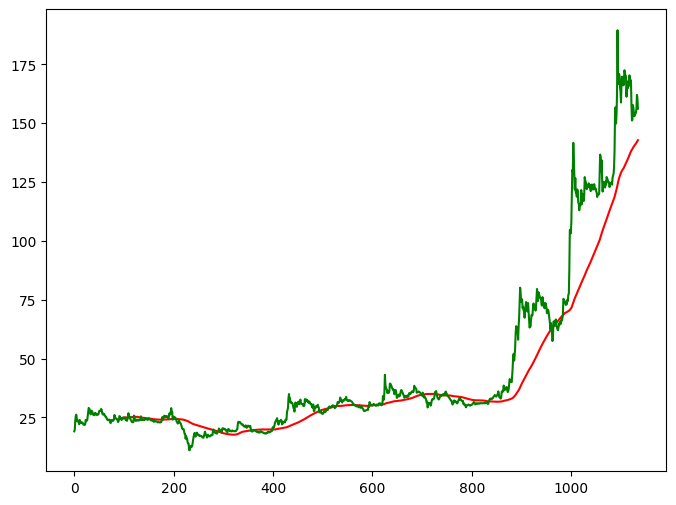

In [23]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [24]:
ma_200_days=data.Close.rolling(200).mean()

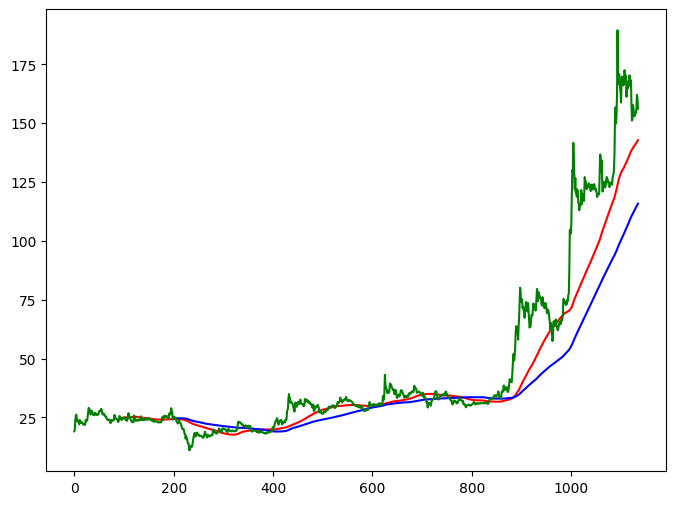

In [25]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [26]:
data.dropna(inplace=True)

In [34]:
data_train=pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close[int(len(data)*0.80) : len(data)])

In [38]:
data_train.shape[0]

908

In [39]:
data_test.shape[0]

227

In [40]:
from sklearn.preprocessing import MinMaxScaler 
scaler=MinMaxScaler(feature_range=(0,1))

In [42]:
data_train_scale=scaler.fit_transform(data_train)

In [43]:
x=[]
y=[]
for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [45]:
x,y = np.array(x), np.array(y)

In [44]:
from keras.layers import Dense , Dropout ,LSTM
from keras.models import Sequential

In [53]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))


In [54]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [57]:
model.fit(x,y,epochs=50,batch_size=32 , verbose =1)

Epoch 1/50
26/26 [==============================] - 9s 122ms/step - loss: 0.0327
Epoch 2/50
26/26 [==============================] - 3s 132ms/step - loss: 0.0101
Epoch 3/50
26/26 [==============================] - 3s 131ms/step - loss: 0.0075
Epoch 4/50
26/26 [==============================] - 3s 130ms/step - loss: 0.0052
Epoch 5/50
26/26 [==============================] - 4s 137ms/step - loss: 0.0075
Epoch 6/50
26/26 [==============================] - 3s 133ms/step - loss: 0.0051
Epoch 7/50
26/26 [==============================] - 3s 134ms/step - loss: 0.0040
Epoch 8/50
26/26 [==============================] - 4s 136ms/step - loss: 0.0047
Epoch 9/50
26/26 [==============================] - 3s 134ms/step - loss: 0.0044
Epoch 10/50
26/26 [==============================] - 4s 135ms/step - loss: 0.0043
Epoch 11/50
26/26 [==============================] - 4s 139ms/step - loss: 0.0048
Epoch 12/50
26/26 [==============================] - 4s 139ms/step - loss: 0.0037
Epoch 13/50
26/26 [======

In [58]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_7 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_8 (LSTM)               (None, 120)              

In [59]:
pas_100_days=data_train.tail(100)

In [60]:
data_test=pd.concat([pas_100_days,data_test],ignore_index=True)

In [63]:
data_test_scale = scaler. fit_transform(data_test)

In [67]:
x=[]
y=[]
for i in range(100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x,y = np.array(x), np.array(y)

In [68]:
y_predict =model .predict(x)

8/8 [==============================] - 1s 34ms/step


In [72]:
scale =1/scaler.scale_ 

In [74]:
y_predict = y_predict * scale

In [75]:
y = y*scale

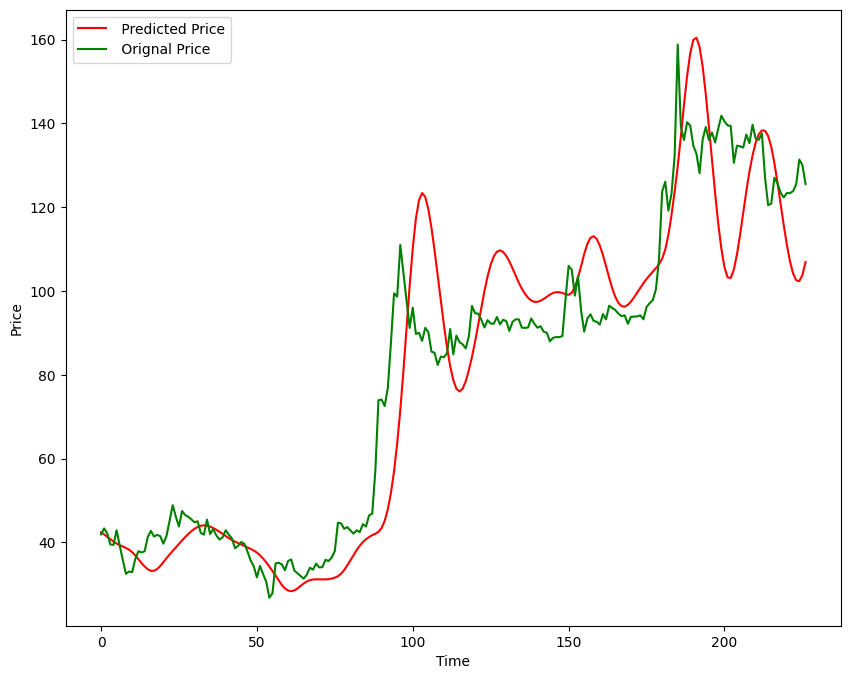

In [77]:
plt.figure(figsize=(10,8))
plt.plot(y_predict ,'r',label=' Predicted Price')
plt.plot(y ,'g',label=' Orignal Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [79]:
model.save('Stock Market Prediction Model.keras')